In [1]:
# Code written myself (Zygmunt Łenyk) with exceptions to:
# used serialized mnist from http://deeplearning.net/tutorial/gettingstarted.html
# shuffle 2 matrices with the same permutation:
# http://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
from sklearn import metrics
from autograd import grad
import autograd.numpy as np
import random
from autograd.scipy.misc import logsumexp
import PIL
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
from matplotlib import pyplot as plt
import utils

labels_count = 10
batch_size = 128
init_scale = 0.05
learning_rate = 0.01
num_of_epochs = 50

# shuffles a and b the same way
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return (a, b)

def softmax(y):
    return np.log(np.exp(y)) - logsumexp(y, axis=1, keepdims=True)

def eval_x(x, W, b):
    return np.dot(x, W) + b

def cost(W, b, batch_images, batch_labels):
    y = eval_x(batch_images, W, b)
    return (-np.sum(softmax(y)*batch_labels) / batch_size)

class Network:
    def __init__(self, classes, size):
        self.W = (init_scale * 2 * (np.random.random((size, classes)) - 0.5))
        self.b = np.random.random((classes))

    def get_w(self):
        return self.W

    def get_label(self, probs):
        return np.argmax(probs, axis=1)
    
    def result_labels(self, probs):
        labels = np.zeros_like(probs)
        labels[np.arange(len(probs)), np.argmax(probs, axis=1)] = 1
        return labels

    def train(self, train_set, test_set):
        for i in range(num_of_epochs):
            acc = self.score(test_set)
            print("After epoch " + str(i) + " : " + str(acc))
            train_images, train_labels = train_set
            shuffle_in_unison_scary(train_images, train_labels)
            for j in range(len(train_labels)//batch_size):
                batch_images = train_images[j*batch_size:(j+1)*batch_size]
                batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
                dw = grad(cost, 0)(self.W, self.b, batch_images, batch_labels)
                db = grad(cost, 1)(self.W, self.b, batch_images, batch_labels)
                self.W = self.W - dw*learning_rate
                self.b = self.b - db*learning_rate

    def predict(self, test_images):
        y = eval_x(test_images, self.W, self.b)
        p = softmax(y)
        return self.result_labels(y)
    
    def score(self, test_set):
        test_images, test_labels = test_set
        predicted_labels = self.predict(test_images)
        return metrics.accuracy_score(test_labels, predicted_labels)

In [2]:
train_set, valid_set, test_set = utils.import_data()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
train_images, train_labels = train_set
network = Network(labels_count, train_images.shape[1])
print("Initialized")
network.train(train_set, valid_set)
print("Score on test set: " + str(network.score(test_set)))

Initialized
After epoch 0 : 0.1396
After epoch 1 : 0.8306
After epoch 2 : 0.8592


KeyboardInterrupt: 

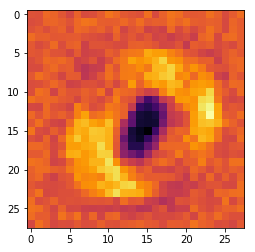

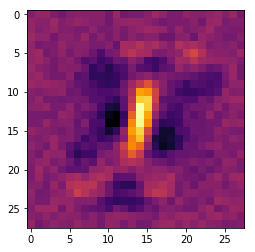

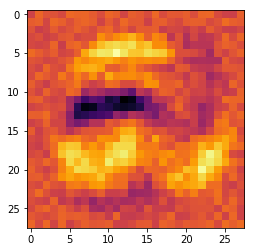

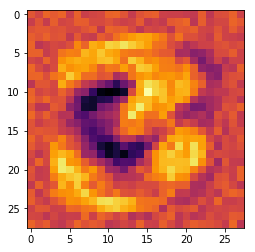

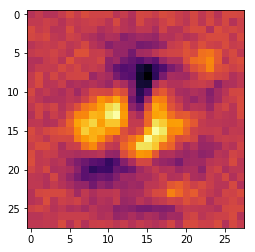

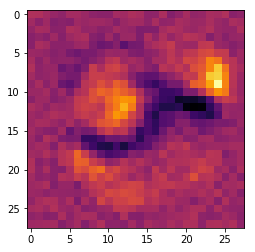

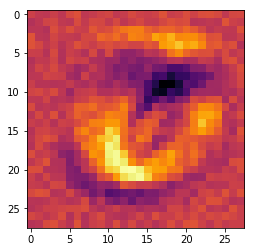

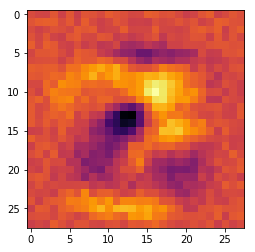

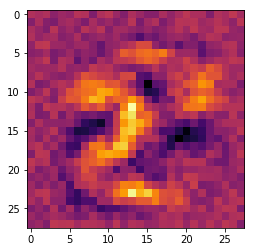

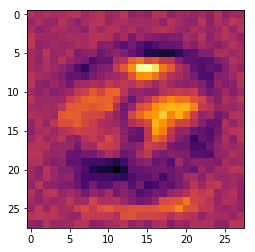

In [8]:

W = network.get_w()
for i in range(10):
    avg = W[:,i]
    plt.imshow(avg.reshape(28,28), cmap='inferno', interpolation='nearest')
    plt.show()

Predicted labels:  2


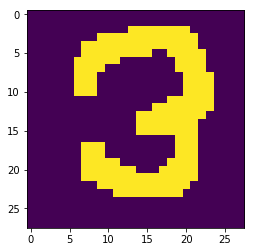

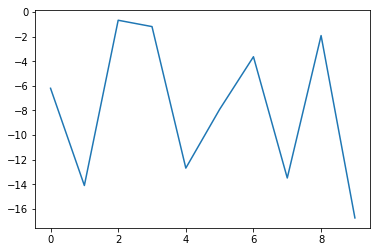

In [11]:
image = Image.open('image.png').convert('L')
inverted_image = PIL.ImageOps.invert(image)
images = np.array(inverted_image).reshape(1, 784)
images = images/255
labels = utils.get_labels(network.predict(images))
print("Predicted labels: ", labels[0])
plt.imshow(images[0].reshape(28,28), interpolation='nearest')
plt.show()
y = np.dot(images, W)
p = softmax(y)
plt.plot(np.arange(0,10), p[0])
plt.show()

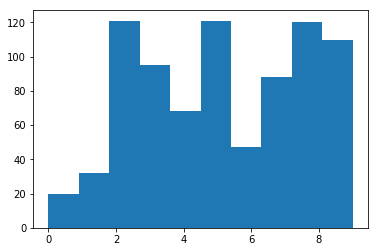

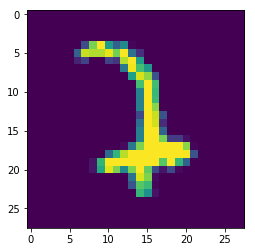

Predicted: 2
Actual: 7


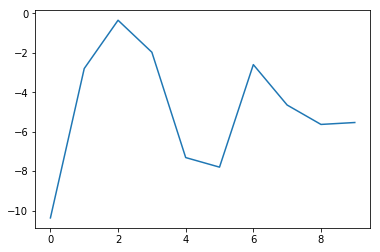

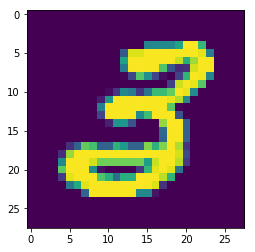

Predicted: 5
Actual: 3


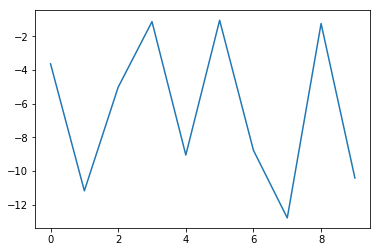

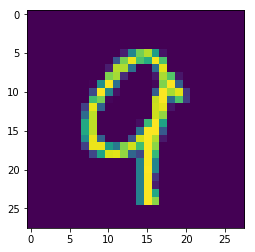

Predicted: 4
Actual: 9


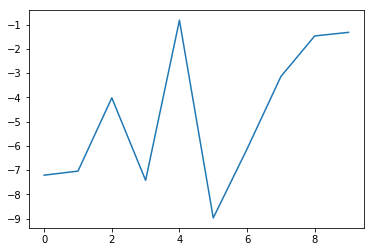

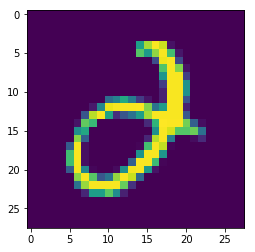

Predicted: 3
Actual: 2


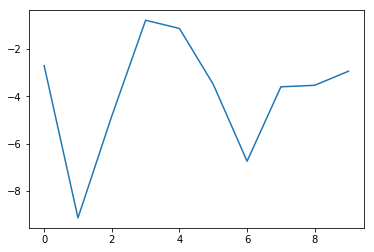

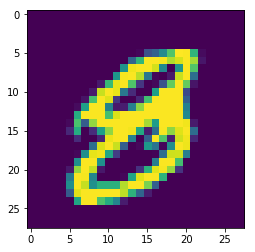

Predicted: 9
Actual: 8


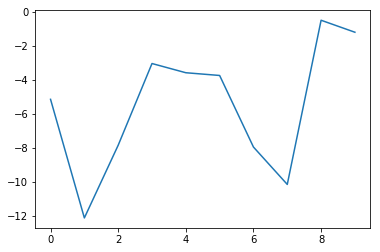

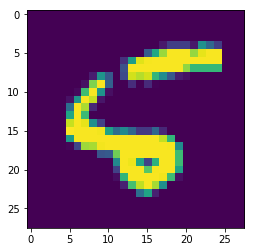

Predicted: 6
Actual: 5


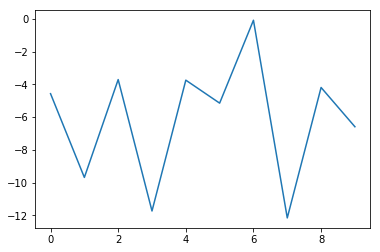

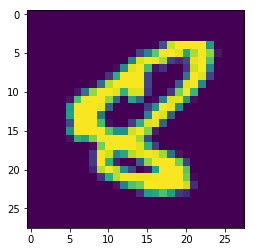

Predicted: 6
Actual: 8


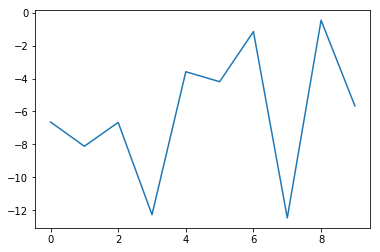

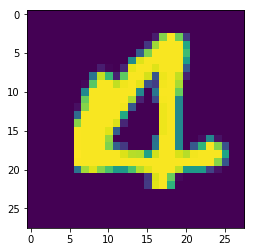

Predicted: 0
Actual: 4


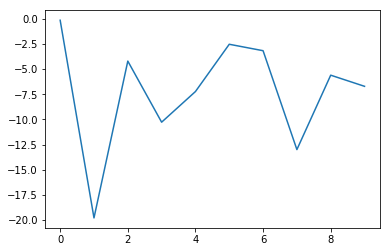

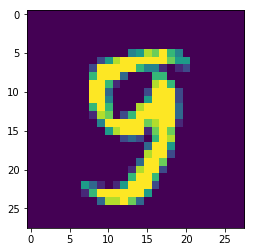

Predicted: 3
Actual: 9


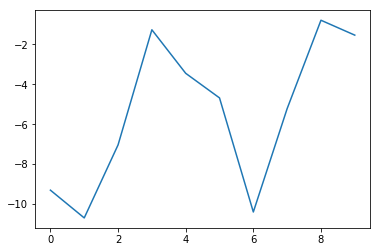

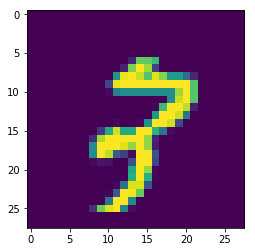

Predicted: 9
Actual: 3


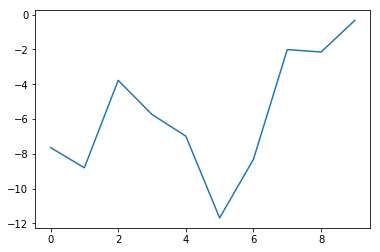

In [10]:
test_images, test_labels = test_set
labels = network.predict(test_images)
not_matching = []
labels = utils.get_labels(labels)
test_labels = utils.get_labels(test_labels)

for i in range(len(labels)):
    if labels[i] != test_labels[i] :
        not_matching.append(i)

random.shuffle(not_matching)
plt.hist(test_labels[not_matching]);
plt.show()



y = np.dot(test_images[not_matching], W)
p = softmax(y)

for i in range(10):
    plt.imshow(test_images[not_matching[i]].reshape(28,28), interpolation='nearest')
    plt.show()
    print("Predicted: " + str(labels[not_matching[i]]))
    print("Actual: " + str(test_labels[not_matching[i]]))
    plt.plot(np.arange(0,10), p[i])
    plt.show()